### Требуков Даниил, ИУ5-63, вариант 10: задача 2, датасет 8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer, MissingIndicator
import warnings
import seaborn as sns
import random
warnings.filterwarnings("ignore")


base_df = pd.read_csv("..\datasets\HousingData.csv")
base_df[base_df.isna().any(axis=1)].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9


In [2]:
base_df.isna().any()

CRIM        True
ZN          True
INDUS       True
CHAS        True
NOX        False
RM         False
AGE         True
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT       True
MEDV       False
dtype: bool

<Axes: >

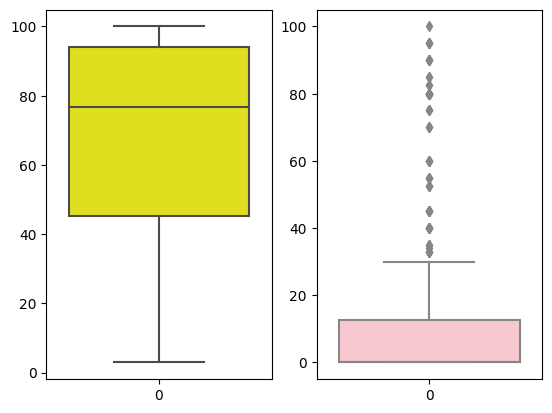

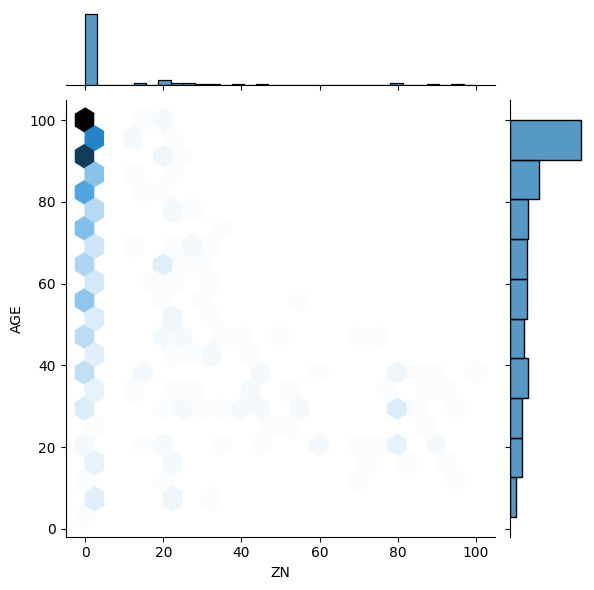

In [6]:
fig, axs = plt.subplots(ncols=2)
sns.jointplot(x="ZN", y="AGE", data=base_df, kind="hex")
sns.boxplot(base_df["ZN"], color="pink", ax=axs[1])
sns.boxplot(base_df["AGE"], color="yellow", ax=axs[0])

In [7]:
def draw_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False) * 100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data = missing_data.loc[missing_data['Total'] != 0]
    missing_data.index.name = 'Column'
    return missing_data



draw_missing(base_df)

,Total,Percent
Column,,
CRIM,20,3.952569
ZN,20,3.952569
INDUS,20,3.952569
CHAS,20,3.952569
AGE,20,3.952569
LSTAT,20,3.952569


Вывод: окло 20% строк мало заполнены
Мы можем найти 

In [9]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=base_df["ZN"].mean())
full_df_1 = base_df.copy()
full_df_1[["ZN"]] = imp.fit_transform(base_df[["ZN"]])
draw_missing(full_df_1)

,Total,Percent
Column,,
CRIM,20,3.952569
INDUS,20,3.952569
CHAS,20,3.952569
AGE,20,3.952569
LSTAT,20,3.952569


In [10]:
strategies=['mean', 'median', 'most_frequent']
cols = ["AGE"]
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column

In [11]:
for i in range(len(cols)):
    full_df_1[cols[i]] = test_num_impute_col(full_df_1, cols[i], strategies[i])
full_df_1["AGE"].fillna(lambda x: random.choice(full_df_1[full_df_1["AGE"] != np.nan]["AGE"]), inplace =True)
draw_missing(full_df_1)

,Total,Percent
Column,,
CRIM,20,3.952569
INDUS,20,3.952569
CHAS,20,3.952569
LSTAT,20,3.952569


Как мы видим, мы заполнили два числовых признака с пробелами используя различные стратегии.
Проверим распределение на графике

<Axes: >

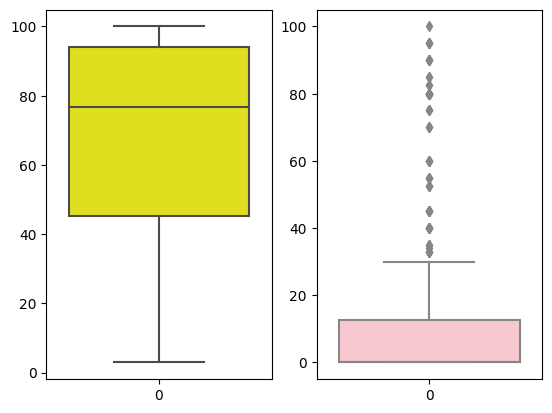

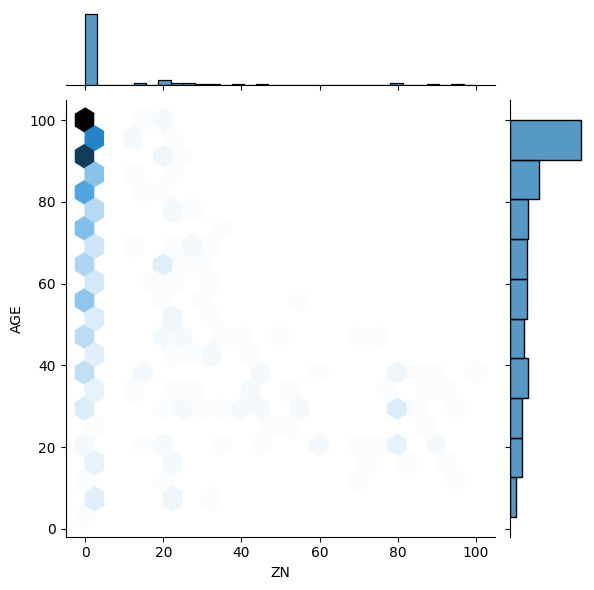

In [13]:
fig, axs = plt.subplots(ncols=2)
sns.jointplot(x="ZN", y="AGE", data=base_df, kind="hex")
sns.boxplot(base_df["ZN"], color="pink", ax=axs[1])
sns.boxplot(base_df["AGE"], color="yellow", ax=axs[0])

Распределение сохранилось, значит все сделали правильно.

Преобразуем признак CHAS в категориальный

{nan, 'no', 'yes'}
[452, 34, 0]


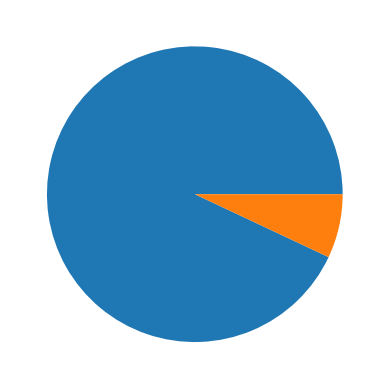

In [36]:
cut_df = pd.cut(base_df["CHAS"], [-1, 0, 1, 2], labels=["no", "yes", "ns"])
print(set(cut_df))
count = [x for x in cut_df.value_counts()]
print(count)
plt.pie(count);

Теперь проведем замену nan на одну из категорий

{'no', 'yes'}
[470, 36, 0]


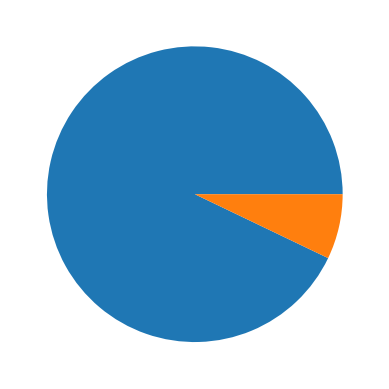

In [37]:
cut_df = cut_df.fillna(pd.Series(np.random.choice(['no', 'yes'], p=[452 / (452 + 34), 34 / (452 + 34)], size=len(cut_df))))
print(set(cut_df))
count = [x for x in cut_df.value_counts()]
print(count)
plt.pie(count);

Как мы видим, доля не изменилась, что и требовалось.